# Introduction to Deep Learning


**What the session is about:**
1. Give an introduction to DL / ANN to get you started with them.
2. Won't be focussing on maths behind it!
3. Focus more on the coding aspect of it.

**What do we expect:**
1. Go back and try to run this notebook by yourself.
2. Play with this notebook --- tweak things here and there.
3. Get acquainted with the syntax and libraries.
4. See a little bit of theory to get better understanding.


### Building block:- Perceptron

- Computation unit. **Input --> Computation --> Output**
- Weights are the learnable parameters.
- Weights determine importance of input signal in the output signal.

<img src="perceptron.png" alt="drawing" width="500"/>

### ANN

- Stacking a bunch of perceptrons.
- Input Layer, Hidden Layer, Output Layer
- Hidden Layer --- Extracted features.

<img src="ann.png" alt="drawing" width="300"/>

### DNN

- ANN with lots of hidden layers.

<img src="deep_nn.jpg" alt="drawing" width="600"/>

1. Image of George Washington given as input.
2. Hidden layers extract relevant info from input (features).
3. Output layers classifies who the person is.

## Fun part --- Coding !!

activation function in model definition.
loss function in model.compile

**Steps in the whole pipeline:**
1. Load and explore the data.
2. Data Preprocessing
3. Build model
4. Build the model again! (Tweak the hyperparameters to get the best model.)
5. Again build the model! (Until you get the best model.)
6. Make predictions



### Fashion MNIST

- A dataset containing images of clothing items.
- Classification task --- 10 classes.


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Init Plugin
Init Graph Optimizer
Init Kernel
2.5.0


### Data Exploration

In [2]:
## Loading the data
## (It will download the data when running for the first time.)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
## Overview of dataset.

print("Shape of training data:", train_images.shape)
print("\nNumber of training images:", len(train_labels))
print("\nNumber of testing images", len(test_labels))
print("\nShape of one image:", train_images[0].shape)

Shape of training data: (60000, 28, 28)

Number of training images: 60000

Number of testing images 10000

Shape of one image: (28, 28)


In [5]:
## Number of images in training data for each category.
import pandas as pd
pd.Series(train_labels).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

### Data Preprocessing

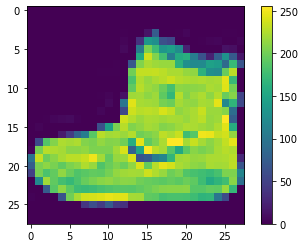

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
## Scaling the values between [0, 1]

## This slightly helps in faster convergence and better accuracy.

train_images = train_images / 255.0
test_images = test_images / 255.0

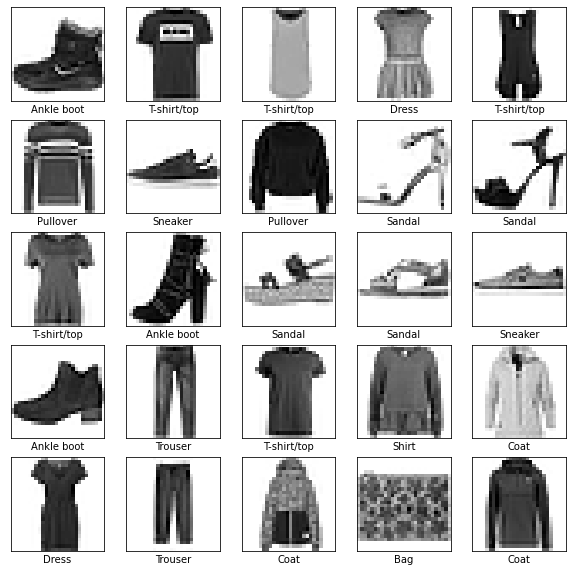

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Model

1. Define the model.
2. Compile it --- specify Loss function, optimizer, evaluation metrics
3. Train the model.

In [40]:
## 1. Defining the model.

model = tf.keras.Sequential([
    ## Flatten the input image from 2D into 1D. (Input Layer)
    ## Input shape based on the dataset image.
    ## All images must be of same shape!!!
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    ## Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),
    ## Output layer --- size = number of classes = 10
    ## Softmax activation function gives the probability of each class
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [41]:
## 2. Compile the model.

model.compile(optimizer='adam',  # Optimizer --- an algorithm which tries to learn weights of the network.
              # Loss --- determines the error in prediction.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # Metric --- calculates how good the model is performing.
              metrics=['accuracy'])

In [42]:
## 3. Training the model.

## Epochs is the number of passes the model takes over the dataset.
## History object stores all the information about the model
history = model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
  24/1875 [..............................] - ETA: 8s - loss: 1.3251 - accuracy: 0.5703 

2021-09-18 19:20:01.395211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.5000 - accuracy: 0.8241
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3792 - accuracy: 0.8628


**The above accuracy is the accuracy on training data which the model has already seen.**

dict_keys(['loss', 'accuracy'])


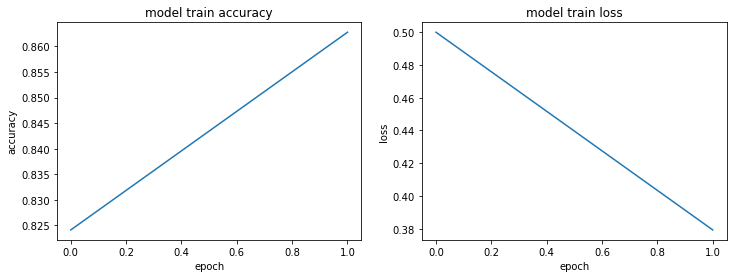

In [43]:
print(history.history.keys())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#  "Accuracy"
axes[0].plot(history.history['accuracy'])
axes[0].set_title('model train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')

# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('model train loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch');

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Better test accuracy => better generalization.
print('\nTest accuracy:', test_acc)

2021-09-18 19:20:19.902368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.4030 - accuracy: 0.8556

Test accuracy: 0.8556000590324402


### Making Predictions

In [69]:
img = test_images[0]

# Throws error!!
# model.predict(img)
print("Model expects the input to be of shape: ", model.input.shape)
print("Shape of our input: ", img.shape)

# Adding an extra dimension.
img = img[np.newaxis, :, :]
print("Shape of our input after adding another dim: ", img.shape)

# Returns probability of each class
print("\nPredicted probabilities:\n", model.predict(img))

# Returns the predicted class
print("\nPredicted class: ", model.predict(img).argmax(axis=1))

print("Actual class: ", test_labels[0])

Model expects the input to be of shape:  (None, 28, 28)
Shape of our input:  (28, 28)
Shape of our input after adding another dim:  (1, 28, 28)

Predicted probabilities:
 [[2.0224141e-05 1.6149674e-07 9.6632730e-06 1.0626729e-06 1.1010465e-05
  1.2846148e-01 2.2610755e-06 8.2791060e-02 1.1036398e-03 7.8759944e-01]]

Predicted class:  [9]
Actual class:  9
